<a href="https://colab.research.google.com/github/anujthapamagar/BDOA/blob/main/ET_3sites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")

# If the data folder doesn't exist, download it and prepare it...
if data_path.is_dir():
  print(f"{data_path} directory already exists... skipping creation")
else: 
  print(f"{data_path} does not exist, creating one...")
  data_path.mkdir(parents=True, exist_ok=True)

# Download Ahja data
with open(data_path / "Ahja-MOD16A2GF-006-Statistics.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Ahja-MOD16A2GF-006-Statistics.csv")
  print("Downloading Ahja MODIS data...")
  f.write(request.content)
  
# Download Nhundiaquara data
with open(data_path / "Nhundiaquara-MOD16A2GF-006-Statistics.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Nhundiaquara-MOD16A2GF-006-Statistics.csv")
  print("Downloading Nhundiaquara MODIS data...")
  f.write(request.content)

# Download Salma data
with open(data_path / "Salma-MOD16A2GF-006-Statistics.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Salma-MOD16A2GF-006-Statistics.csv")
  print("Downloading Salma MODIS data...")
  f.write(request.content)

data does not exist, creating one...


In [ ]:
print(f"Content type: {request.headers['content-type']}")
print(f"Encoding:     {request.encoding}")
print(f"Status code:  {request.status_code} (200=OK, 400=Bad Request)")

Content type: text/plain; charset=utf-8
Encoding:     utf-8
Status code:  200 (200=OK, 400=Bad Request)


In [ ]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

%matplotlib inline  

In [ ]:
Ahja_ET_PET = "https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Ahja-MOD16A2GF-006-Statistics.csv"

Nhundiaquara_ET_PET = "https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Nhundiaquara-MOD16A2GF-006-Statistics.csv"

Salma_ET_PET = "https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Salma-MOD16A2GF-006-Statistics.csv"


In [ ]:
Ahja = pd.read_csv(Ahja_ET_PET,sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
# create a copy for demo use!
Ahja_1 = Ahja.copy()

Ahja.index=pd.to_datetime(Ahja.index)
Ahja

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2000-01-01,MOD16A2GF_006_ET_500m_doy2000001_aid0001,ET_500m,aid0001,8382.0,-0.4,1.5,"(-0.4,1.5)",1.138762,0.294772,0.086890,1.4,1.5,1.2,0.4,1.0
2000-01-09,MOD16A2GF_006_ET_500m_doy2000009_aid0001,ET_500m,aid0001,8382.0,-0.3,1.6,"(-0.3,1.6)",1.287008,0.298184,0.088914,1.5,1.6,1.4,0.8,1.2
2000-01-17,MOD16A2GF_006_ET_500m_doy2000017_aid0001,ET_500m,aid0001,8382.0,-0.2,2.1,"(-0.2,2.1)",1.640933,0.360377,0.129872,1.9,2.1,1.7,0.9,1.5
2000-01-25,MOD16A2GF_006_ET_500m_doy2000025_aid0001,ET_500m,aid0001,8382.0,-0.2,2.0,"(-0.2,2.0)",1.583274,0.351500,0.123552,1.8,2.0,1.7,0.8,1.4
2000-02-02,MOD16A2GF_006_ET_500m_doy2000033_aid0001,ET_500m,aid0001,8382.0,0.1,1.5,"(0.1,1.5)",1.279886,0.170529,0.029080,1.4,1.5,1.3,0.9,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,MOD16A2GF_006_PET_500m_doy2021329_aid0001,PET_500m,aid0001,8386.0,0.6,2.6,"(0.6,2.6)",1.751359,0.222084,0.049321,1.9,2.2,1.8,1.4,1.7
2021-12-03,MOD16A2GF_006_PET_500m_doy2021337_aid0001,PET_500m,aid0001,8386.0,0.7,1.8,"(0.7,1.8)",1.595194,0.200398,0.040159,1.7,1.8,1.7,1.5,1.6
2021-12-11,MOD16A2GF_006_PET_500m_doy2021345_aid0001,PET_500m,aid0001,8386.0,0.5,2.0,"(0.5,2.0)",1.218829,0.158041,0.024977,1.3,1.4,1.3,1.1,1.2


In [ ]:
Nhundiaquara = pd.read_csv(Nhundiaquara_ET_PET,sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
# create a copy for demo use!
Nhundiaquara_1 = Nhundiaquara.copy()

Nhundiaquara.index=pd.to_datetime(Nhundiaquara.index)
Nhundiaquara

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2000-01-01,MOD16A2GF_006_ET_500m_doy2000001_aid0001,ET_500m,aid0001,1792.0,18.5,38.4,"(18.5,38.4)",25.474777,2.819262,7.948237,27.4,29.1,26.4,18.5,23.675
2000-01-09,MOD16A2GF_006_ET_500m_doy2000009_aid0001,ET_500m,aid0001,1792.0,18.8,41.0,"(18.8,41.0)",26.378906,3.121682,9.744901,28.5,30.3,27.4,18.8,24.400
2000-01-17,MOD16A2GF_006_ET_500m_doy2000017_aid0001,ET_500m,aid0001,1792.0,19.7,44.0,"(19.7,44.0)",29.151897,3.657512,13.377396,31.6,38.3,30.5,20.1,27.000
2000-01-25,MOD16A2GF_006_ET_500m_doy2000025_aid0001,ET_500m,aid0001,1792.0,18.5,40.5,"(18.5,40.5)",26.918471,3.154339,9.949854,29.0,30.8,28.0,19.0,25.000
2000-02-02,MOD16A2GF_006_ET_500m_doy2000033_aid0001,ET_500m,aid0001,1792.0,19.3,42.3,"(19.3,42.3)",28.636105,3.328685,11.080142,30.9,37.0,29.9,20.4,26.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,MOD16A2GF_006_PET_500m_doy2021329_aid0001,PET_500m,aid0001,1792.0,60.8,75.8,"(60.8,75.8)",69.786830,1.747471,3.053655,70.9,72.6,70.2,67.7,69.600
2021-12-03,MOD16A2GF_006_PET_500m_doy2021337_aid0001,PET_500m,aid0001,1792.0,48.9,66.9,"(48.9,66.9)",59.052344,3.324291,11.050910,61.8,66.9,60.7,48.9,55.100
2021-12-11,MOD16A2GF_006_PET_500m_doy2021345_aid0001,PET_500m,aid0001,1792.0,43.8,75.2,"(43.8,75.2)",64.290737,5.247231,27.533430,68.3,75.2,67.2,46.8,58.525


In [ ]:

Salma = pd.read_csv(Salma_ET_PET,sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
# create a copy for demo use!
Salma_1 = Salma.copy()

Salma.index=pd.to_datetime(Salma.index)
Salma


,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2000-01-01,MOD16A2GF_006_ET_500m_doy2000001_aid0001,ET_500m,aid0001,66728.0,2.1,4.9,"(2.1,4.9)",3.527832,0.733029,0.537331,4.2,4.9,3.6,2.1,2.8
2000-01-09,MOD16A2GF_006_ET_500m_doy2000009_aid0001,ET_500m,aid0001,66728.0,4.1,7.4,"(4.1,7.4)",6.268466,0.399795,0.159836,6.5,7.2,6.2,5.3,6.0
2000-01-17,MOD16A2GF_006_ET_500m_doy2000017_aid0001,ET_500m,aid0001,66728.0,3.1,9.3,"(3.1,9.3)",6.290238,1.136514,1.291663,7.0,8.8,6.6,4.0,5.8
2000-01-25,MOD16A2GF_006_ET_500m_doy2000025_aid0001,ET_500m,aid0001,66728.0,5.2,10.0,"(5.2,10.0)",7.560660,0.841275,0.707743,7.9,9.2,7.3,5.7,7.0
2000-02-02,MOD16A2GF_006_ET_500m_doy2000033_aid0001,ET_500m,aid0001,66728.0,4.3,9.2,"(4.3,9.2)",6.763781,0.784974,0.616185,7.1,8.4,6.5,4.9,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,MOD16A2GF_006_PET_500m_doy2020329_aid0001,PET_500m,aid0001,66728.0,0.2,24.5,"(0.2,24.5)",16.185225,2.649137,7.017926,17.9,23.4,15.6,8.9,14.2
2020-12-02,MOD16A2GF_006_PET_500m_doy2020337_aid0001,PET_500m,aid0001,66728.0,-2.2,17.4,"(-2.2,17.4)",10.413327,2.202875,4.852657,11.8,16.1,10.1,5.0,8.9
2020-12-10,MOD16A2GF_006_PET_500m_doy2020345_aid0001,PET_500m,aid0001,66728.0,2.4,16.4,"(2.4,16.4)",9.999829,1.705627,2.909165,11.1,14.5,9.9,5.5,8.8


In [ ]:
# Create empty DataFrames
modis_ET  = pd.DataFrame()
modis_PET = pd.DataFrame()

# Separates what is evapotranspiration from potential evapotranspiration

# Pick only the column "Mean"
modis_ET['Hari ET (mm/8day)'] = Salma.query("Dataset == 'ET_500m'")['Mean']
modis_ET['Nhundiaquara ET (mm/8day)'] = Nhundiaquara.query("Dataset == 'ET_500m'")['Mean']
modis_ET['Ahja ET (mm/8day)'] = Ahja.query("Dataset == 'ET_500m'")['Mean']

modis_PET['Hari PET (mm/8day)'] = Salma.query("Dataset == 'PET_500m'")['Mean']
modis_PET['Nhundiaquara PET (mm/8day)'] = Nhundiaquara.query("Dataset == 'PET_500m'")['Mean']
modis_PET['Ahja PET (mm/8day)'] = Ahja.query("Dataset == 'PET_500m'")['Mean']

In [ ]:
modis_ET

,Hari ET (mm/8day),Nhundiaquara ET (mm/8day),Ahja ET (mm/8day)
Date,,,
2000-01-01,3.527832,25.474777,1.138762
2000-01-09,6.268466,26.378906,1.287008
2000-01-17,6.290238,29.151897,1.640933
2000-01-25,7.560660,26.918471,1.583274
2000-02-02,6.763781,28.636105,1.279886
...,...,...,...
2020-11-24,7.500534,44.748605,0.798188
2020-12-02,6.491082,35.372377,1.118447
2020-12-10,6.402873,38.752734,1.172013


In [ ]:
modis_PET

,Hari PET (mm/8day),Nhundiaquara PET (mm/8day),Ahja PET (mm/8day)
Date,,,
2000-01-01,26.503321,33.071931,1.069709
2000-01-09,10.831318,33.600056,1.230220
2000-01-17,8.601710,39.508650,1.557540
2000-01-25,15.225252,36.349386,1.495574
2000-02-02,13.947754,39.068694,1.286388
...,...,...,...
2020-11-24,16.185225,61.567801,0.567207
2020-12-02,10.413327,46.384431,0.377856
2020-12-10,9.999829,52.096987,0.874589


<Axes: xlabel='Date'>

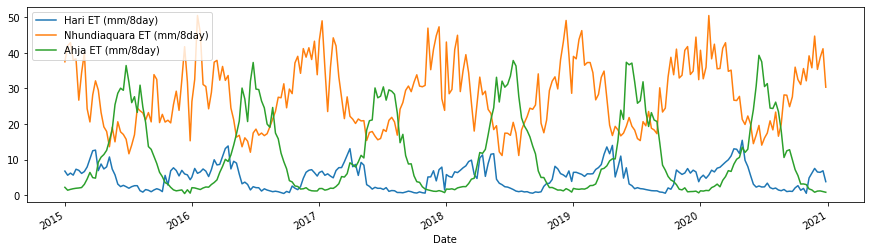

In [ ]:
# View evapotranspiration data (8 accumulated days) (2015-2020)
modis_ET['2015':'2020'].plot(figsize=(15,4))

In [ ]:
Ahja_ET_PET = "https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Ahja-MOD16A2GF-006-Statistics.csv"

Ahja_1 = requests.get(Ahja_ET_PET).content